<a href="https://colab.research.google.com/github/michelleruas/Data_Visualisation_Techniques/blob/master/Heart_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardiovascular Disease
Also known as heart disease. This is assosiated with a condition with a narrowed blood vessel that can lead to a heart attack. If this is identified early, life style choices can be recommended leading to avoiding a big heart problem. 
This program will classify a person as having a cardiovascular disease or not.

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#]Load the data
from google.colab import files
uploaded = files.upload()


Saving cardio.csv to cardio.csv


In [4]:
#Looking at the data
df = pd.read_csv('cardio.csv')
df.head(7)
df.shape

(70000, 1)

In [5]:
#Fixing the columns
df = pd.read_csv('cardio.csv', sep =';')
df.head(7)
df.shape

(70000, 13)

In [6]:
#Count empty or null values in each column
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
#Another way to check for null or missing values
df.isnull().values.any()

False

In [8]:
#View some basic statistics
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Get a count of the number of patients or individuals with cardiovascular disease and without
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

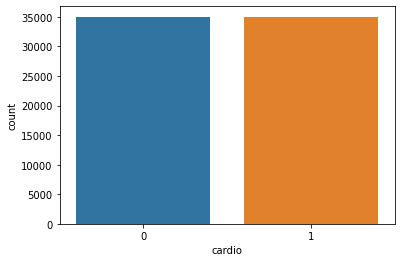

In [10]:
#Visualise the count
sns.countplot(df['cardio'])

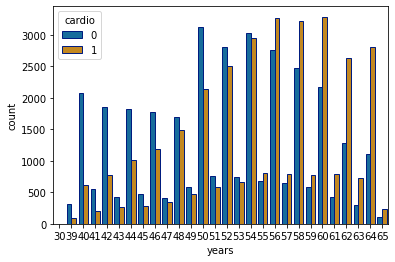

In [11]:
#Look at the number of people with a cardiovascular disease that exceed the number of people without a cardiovascular disease

#Create a years column
df['years'] = (df['age'] / 365).round(0)
df['years'] = pd.to_numeric(df['years'], downcast = 'integer')

#Visualise the data
sns.countplot(x = 'years', hue = 'cardio', data =df, palette = 'colorblind', edgecolor = sns.color_palette('dark', n_colors=1))

In [12]:
#Get correlation of the columns, seeing how the columns are correlated to eachother
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


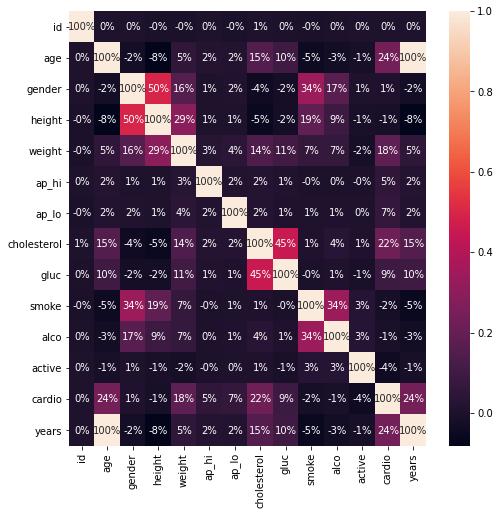

In [13]:
#Visualise the data
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [14]:
#Remove or drop the years column
df = df.drop('years', axis = 1)

In [15]:
#Remove the id column
df = df.drop('id', axis = 1)

In [16]:
#Split data into independent data set / feature data (X) and the target data set (Y)
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [17]:
#Split the data again into 75% training, 25% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state =1)

In [19]:
#Feature Scaling - scale data to be values between 0 and 1 inclusive
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [20]:
#Use Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [22]:
#Test the model's accuracy on the training data set
model = forest
model.score(x_train, y_train)

0.979904761904762

In [27]:
#Test the models accuracy on the test data set
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model.predict(x_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

#Print the confusion matrix
print(cm)

#Print the models accuracy on the test data
print('Model Test Accuracy = {}'.format((TP+TN)/(TP+TN+FN+FP)))

[[6589 2020]
 [3349 5542]]
Model Test Accuracy = 0.6932


This is not bad to start, but we would need to get it closer to 1.0 as it is dealing with health data.